In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/DATASET FOR COLAB/website_daily visits/daily-website-visitors.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Row                2167 non-null   int64 
 1   Day                2167 non-null   object
 2   Day.Of.Week        2167 non-null   int64 
 3   Date               2167 non-null   object
 4   Page.Loads         2167 non-null   object
 5   Unique.Visits      2167 non-null   object
 6   First.Time.Visits  2167 non-null   object
 7   Returning.Visits   2167 non-null   object
dtypes: int64(2), object(6)
memory usage: 135.6+ KB


,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,9/14/2014,"2,146","1,582","1,430",152
1,2,Monday,2,9/15/2014,"3,621","2,528","2,297",231
2,3,Tuesday,3,9/16/2014,"3,698","2,630","2,352",278
3,4,Wednesday,4,9/17/2014,"3,667","2,614","2,327",287
4,5,Thursday,5,9/18/2014,"3,316","2,366","2,130",236


In [3]:
# Step 2: Convert 'Date/Time' to datetime Dtype
df['Date'] = pd.to_datetime(df['Date'])
print(df['Date'].head())

0   2014-09-14
1   2014-09-15
2   2014-09-16
3   2014-09-17
4   2014-09-18
Name: Date, dtype: datetime64[ns]


In [4]:
# Step 3: Set 'Date' as index (Optional but useful for time series)
df.set_index('Date', inplace=True)
print(df.index)

DatetimeIndex(['2014-09-14', '2014-09-15', '2014-09-16', '2014-09-17',
               '2014-09-18', '2014-09-19', '2014-09-20', '2014-09-21',
               '2014-09-22', '2014-09-23',
               ...
               '2020-08-10', '2020-08-11', '2020-08-12', '2020-08-13',
               '2020-08-14', '2020-08-15', '2020-08-16', '2020-08-17',
               '2020-08-18', '2020-08-19'],
              dtype='datetime64[ns]', name='Date', length=2167, freq=None)


In [5]:
# Check for null values
print("Null values per column:")
print(df.isnull().sum())

# Check for duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())

Null values per column:
Row                  0
Day                  0
Day.Of.Week          0
Page.Loads           0
Unique.Visits        0
First.Time.Visits    0
Returning.Visits     0
dtype: int64
Number of duplicate rows: 0


In [6]:
# Check for anomalies in 'Date/Time' (e.g., out-of-range dates)
print("Date range:", df.index.min(), "to", df.index.max())

Date range: 2014-09-14 00:00:00 to 2020-08-19 00:00:00


In [7]:
df.describe()

,Row,Day.Of.Week
count,2167.000000,2167.000000
mean,1084.000000,3.997231
std,625.703338,2.000229
min,1.000000,1.000000
25%,542.500000,2.000000
50%,1084.000000,4.000000
75%,1625.500000,6.000000
max,2167.000000,7.000000


In [8]:
# Convert other non-integer rows to integer
for col in ['Page.Loads', 'Unique.Visits', 'First.Time.Visits', 'Returning.Visits']:
    df[col] = df[col].str.replace(',', '').astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2167 entries, 2014-09-14 to 2020-08-19
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Row                2167 non-null   int64 
 1   Day                2167 non-null   object
 2   Day.Of.Week        2167 non-null   int64 
 3   Page.Loads         2167 non-null   int64 
 4   Unique.Visits      2167 non-null   int64 
 5   First.Time.Visits  2167 non-null   int64 
 6   Returning.Visits   2167 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 135.4+ KB


In [9]:
df.head()

,Row,Day,Day.Of.Week,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
Date,,,,,,,
2014-09-14,1,Sunday,1,2146,1582,1430,152
2014-09-15,2,Monday,2,3621,2528,2297,231
2014-09-16,3,Tuesday,3,3698,2630,2352,278
2014-09-17,4,Wednesday,4,3667,2614,2327,287
2014-09-18,5,Thursday,5,3316,2366,2130,236


In [10]:
df.describe()

,Row,Day.Of.Week,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
count,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000
mean,1084.000000,3.997231,4116.989386,2943.646516,2431.824181,511.822335
std,625.703338,2.000229,1350.977843,977.886472,828.704688,168.736370
min,1.000000,1.000000,1002.000000,667.000000,522.000000,133.000000
25%,542.500000,2.000000,3114.500000,2226.000000,1830.000000,388.500000
50%,1084.000000,4.000000,4106.000000,2914.000000,2400.000000,509.000000
75%,1625.500000,6.000000,5020.500000,3667.500000,3038.000000,626.500000
max,2167.000000,7.000000,7984.000000,5541.000000,4616.000000,1036.000000


In [11]:
# Step : Use daily frequency of 1st time visitors
df_1st_time = df['First.Time.Visits']
print(df_1st_time.head())
print(df_1st_time.tail())

Date
2014-09-14    1430
2014-09-15    2297
2014-09-16    2352
2014-09-17    2327
2014-09-18    2130
Name: First.Time.Visits, dtype: int64
Date
2020-08-15    1373
2020-08-16    1686
2020-08-17    2181
2020-08-18    2184
2020-08-19    1297
Name: First.Time.Visits, dtype: int64


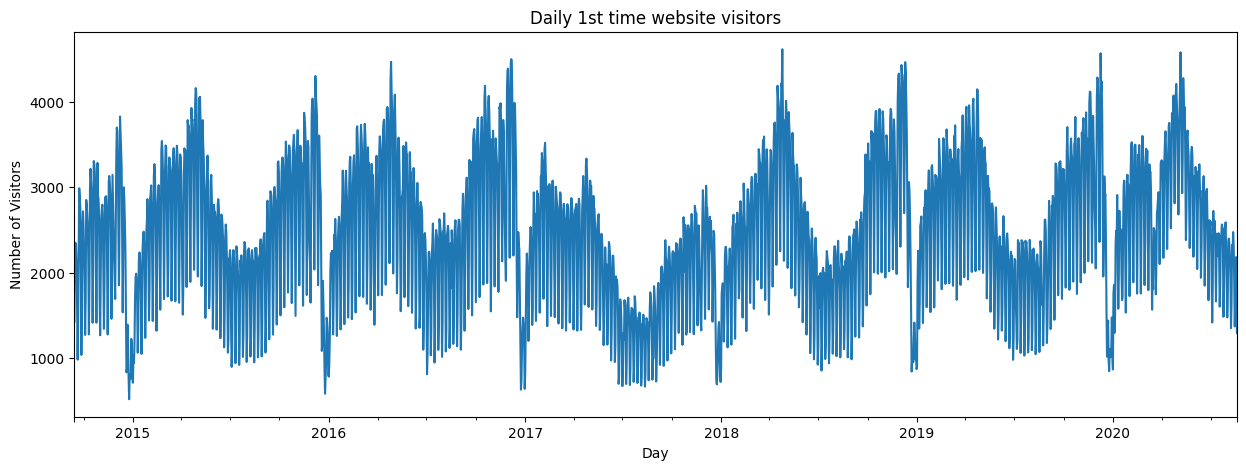

In [12]:
# Step _: Plot the time series, 1st time visitors per day
plt.figure(figsize=(15,5))
df_1st_time.plot()
plt.title('Daily 1st time website visitors')
plt.xlabel('Day')
plt.ylabel('Number of Visitors')
plt.show()

In [13]:
# Create lag features
visits_df = df_1st_time.to_frame(name='visits')
visits_df['lag1'] = visits_df['visits'].shift(1)
visits_df['lag2'] = visits_df['visits'].shift(2)
visits_df['lag3'] = visits_df['visits'].shift(3)
visits_df = visits_df.dropna()

visits_df.head()

,visits,lag1,lag2,lag3
Date,,,,
2014-09-17,2327,2352.0,2297.0,1430.0
2014-09-18,2130,2327.0,2352.0,2297.0
2014-09-19,1622,2130.0,2327.0,2352.0
2014-09-20,985,1622.0,2130.0,2327.0
2014-09-21,1481,985.0,1622.0,2130.0


In [14]:
visits_df.shape

(2164, 4)

In [15]:
from sklearn.model_selection import train_test_split

X = visits_df[['lag1', 'lag2', 'lag3']]
y = visits_df['visits']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))

MSE: 120292.7125669746


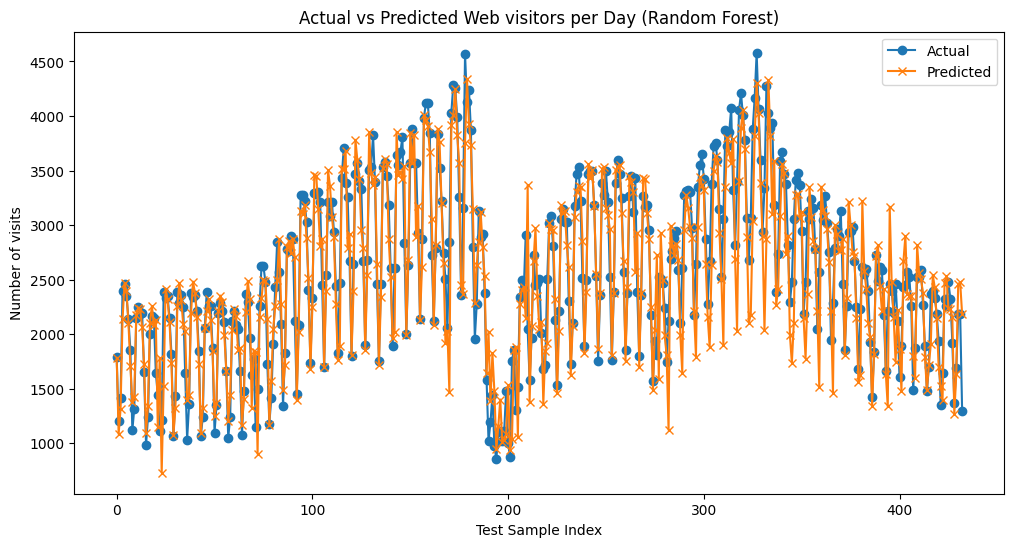

In [17]:
# Plot actual vs predicted for Random Forest
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted Web visitors per Day (Random Forest)')
plt.xlabel('Test Sample Index')
plt.ylabel('Number of visits')
plt.legend()
plt.show()

In [18]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print('XGBoost MSE:', mean_squared_error(y_test, y_pred_xgb))

XGBoost MSE: 133338.671875


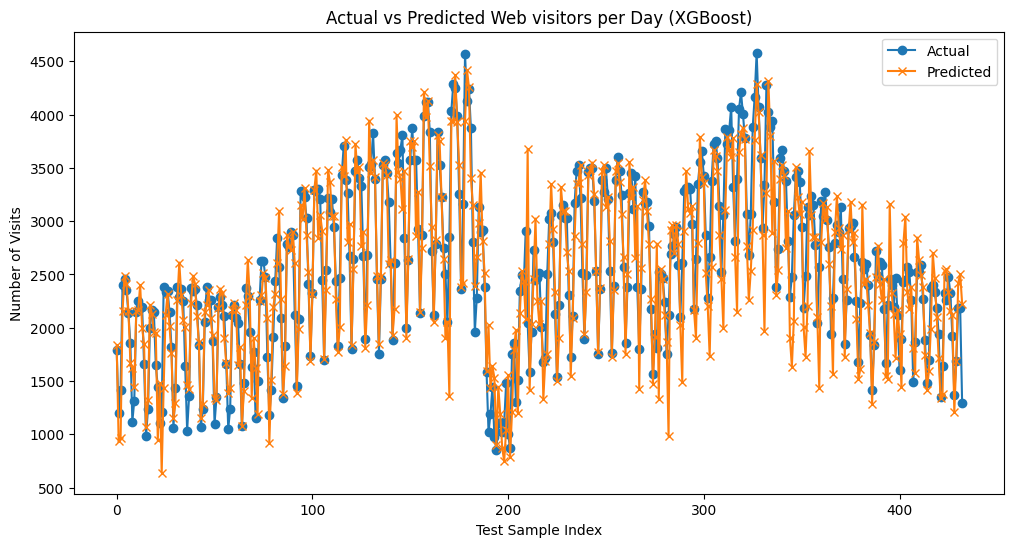

In [19]:
# Plot actual vs predicted for XGBoost
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred_xgb, label='Predicted', marker='x')
plt.title('Actual vs Predicted Web visitors per Day (XGBoost)')
plt.xlabel('Test Sample Index')
plt.ylabel('Number of Visits')
plt.legend()
plt.show()

In [20]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [24]:
# Prepare data (assuming visits_df is already created with lag features)
X = visits_df[['lag1', 'lag2', 'lag3']].values
y = visits_df['visits'].values

In [25]:
# Reshape X for LSTM: (samples, timesteps, features)
X_lstm = X.reshape((X.shape[0], X.shape[1], 1))

In [26]:
# Split into train and test
split = int(0.8 * len(X_lstm))
X_train, X_test = X_lstm[:split], X_lstm[split:]
y_train, y_test = y[:split], y[split:]

In [28]:
# Build LSTM model
from tensorflow.keras.layers import Input

model = Sequential()
model.add(Input(shape=(X_train.shape[1], 1))) # Add Input layer
model.add(LSTM(50, activation='relu')) # Removed input_shape from LSTM
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [29]:
# Train model
model.fit(X_train, y_train, epochs=20, verbose=1)

Epoch 1/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3780893.0000
Epoch 2/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 731725.3750
Epoch 3/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 463004.0625
Epoch 4/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 296071.0000
Epoch 5/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 200538.4688
Epoch 6/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 253695.5625
Epoch 7/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 198429.9219
Epoch 8/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 190485.1250
Epoch 9/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 243703.5625
Epoch 10/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 198405.8125
Epoch 11/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 150010.5000
Epoch 12/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 157184.0000
Epoch 13/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 140504.0625
Epoch 14/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 135493.2031
Epoch 15/20
55

In [30]:
# Predict
y_pred_lstm = model.predict(X_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred_lstm)
mae = mean_absolute_error(y_test, y_pred_lstm)
r2 = r2_score(y_test, y_pred_lstm)

print("LSTM MSE:", mse)
print("LSTM MAE:", mae)
print("LSTM R2:", r2)

LSTM MSE: 238774.71875
LSTM MAE: 373.84869384765625
LSTM R2: 0.6197192668914795


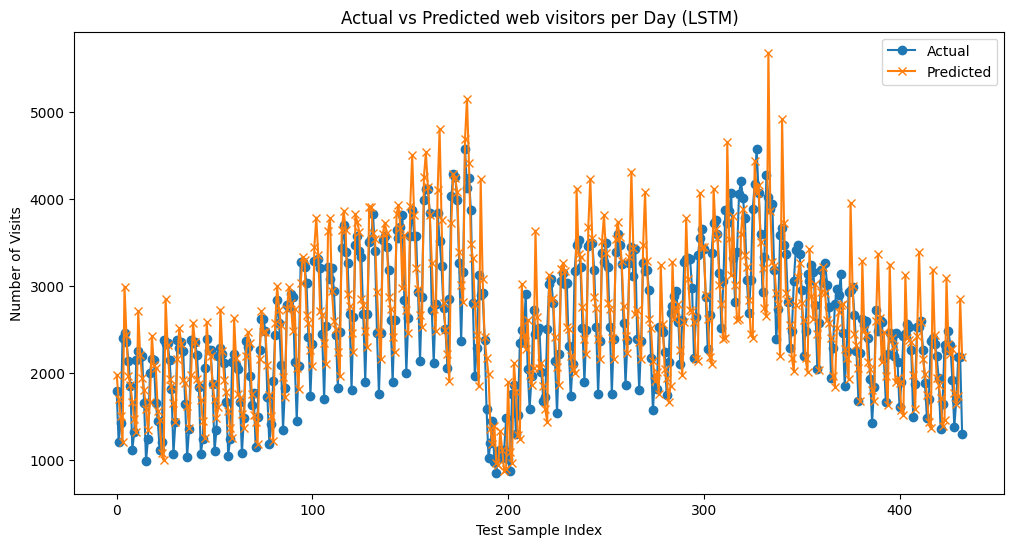

In [32]:
# Plot actual vs predicted
plt.figure(figsize=(12,6))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(y_pred_lstm, label='Predicted', marker='x')
plt.title('Actual vs Predicted web visitors per Day (LSTM)')
plt.xlabel('Test Sample Index')
plt.ylabel('Number of Visits')
plt.legend()
plt.show()

In [34]:
# Forecast next 5 time steps using LSTM
n_forecast = 5
last_known = visits_df[['lag1', 'lag2', 'lag3']].values[-1]  # shape (3,)
future_preds = []

for _ in range(n_forecast):
    # Reshape for LSTM: (samples=1, timesteps=3, features=1)
    input_lstm = last_known.reshape((1, 3, 1))
    pred = model.predict(input_lstm)[0, 0]  # Get scalar prediction
    future_preds.append(pred)
    # Update lag window: shift and add new prediction
    last_known = np.array([pred, last_known[0], last_known[1]])

print("Next 5 forecasted values:", future_preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Next 5 forecasted values: [np.float32(2184.69), np.float32(1797.7195), np.float32(1637.1432), np.float32(1458.3645), np.float32(1291.4316)]


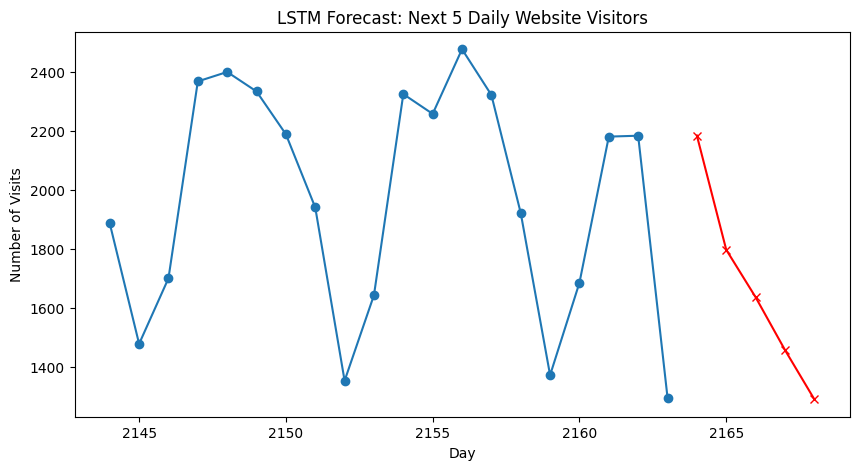

In [35]:
# Visualize the last actual values and the next 5 LSTM forecasts

plt.figure(figsize=(10,5))
# Plot last 20 actual values
plt.plot(range(len(visits_df['visits'])-20, len(visits_df['visits'])), visits_df['visits'].values[-20:], label='Actual', marker='o')
# Plot forecasts
forecast_x = range(len(visits_df['visits']), len(visits_df['visits']) + len(future_preds))
plt.plot(forecast_x, future_preds, label='LSTM Forecast', marker='x', color='red')
plt.title('LSTM Forecast: Next 5 Daily Website Visitors')
plt.xlabel('Day')
plt.ylabel('Number of Visits')
plt.show()

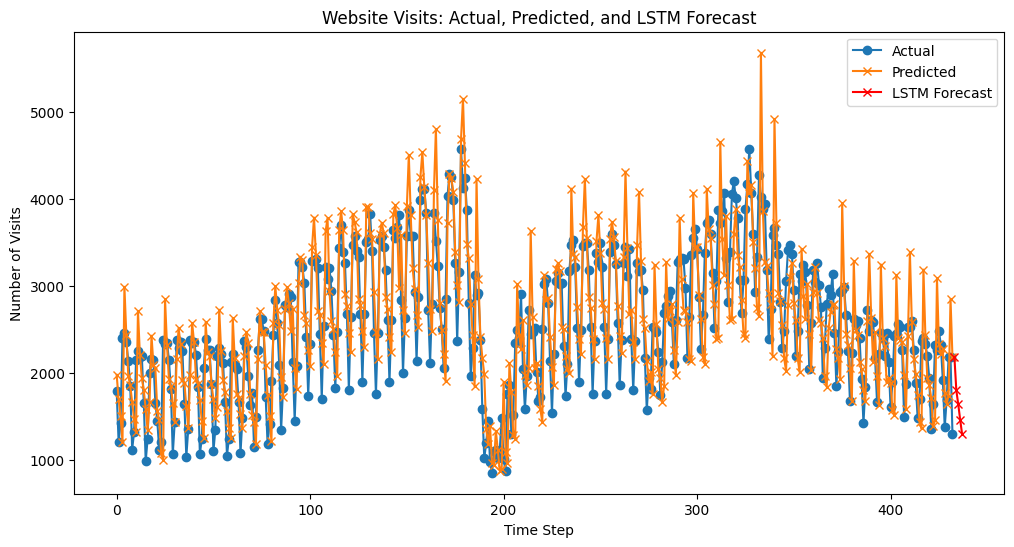

In [36]:
plt.figure(figsize=(12,6))

# Plot actual test values
plt.plot(range(len(y_test)), y_test, label='Actual', marker='o')

# Plot predicted test values
plt.plot(range(len(y_test)), y_pred_lstm, label='Predicted', marker='x')

# Plot forecasted future values, continuing from the end of test set
forecast_x = range(len(y_test), len(y_test) + len(future_preds))
plt.plot(forecast_x, future_preds, label='LSTM Forecast', marker='x', color='red')

plt.title('Website Visits: Actual, Predicted, and LSTM Forecast')
plt.xlabel('Time Step')
plt.ylabel('Number of Visits')
plt.legend()
plt.show()